In [6]:
import pandas as pd
import numpy as np

In [7]:
bike = pd.read_csv('day.csv', low_memory=False)

# DATA ANALYSIS

In [8]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
bike.shape

(730, 16)

In [10]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# DATA CLEANING

### NULL PERCENTAGE CHECK

In [12]:
(bike.isnull().sum().sum() / (bike.shape[0]*bike.shape[1]))

0.0

##### Observation: no null value found

### DUPLICATE ROWS CHECK

In [13]:
bike[bike.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


##### observation: all rows are unique

In [14]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [16]:
bike.yr.unique()

array([0, 1])

### REMOVING COLUMNS


##### Observation: dteday seems to be redundent column as the information of the year and month is already present in yr and mnth column, so dropping the column dteday

In [17]:
del bike['dteday']

In [18]:
bike.shape

(730, 15)

In [19]:
bike.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
len(bike.instant.unique())

730

##### Observation: instant is a complete unique column. It won't be helpful in creating Linear regression model. Hence, dropping.

In [21]:
bike.shape

(730, 15)

In [22]:
bike.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [23]:
bike.tail()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


##### Observation: cnt seems to be a summation of registered and casual. And as per the business requirement they want to understand the factors effecting the demand for the bikes. The factors could be weather, day of the month, weekend or weekday or temperature.

In [24]:
del bike['casual']

In [25]:
del bike['registered']

In [26]:
bike.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


# VISUALISATION

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


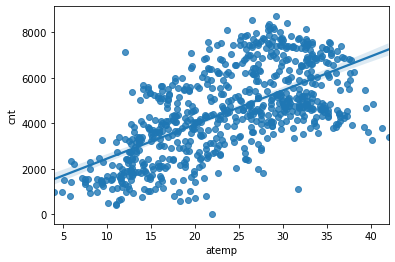

In [29]:
sns.regplot(x='atemp',y='cnt', data=bike)
plt.show()

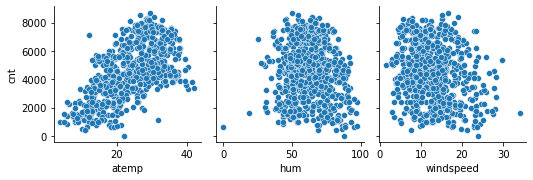

In [30]:
sns.pairplot(x_vars=['atemp','hum','windspeed'],
             y_vars='cnt', data=bike)
plt.show()

##### Observation: Instant is sequencing with all unique varaibles so its not requried. Dropping instant.

##### Observation: It looks like atemp has positive corelation with the count. hum and windspeed has negative corelation with count.

In [31]:
del bike['instant']

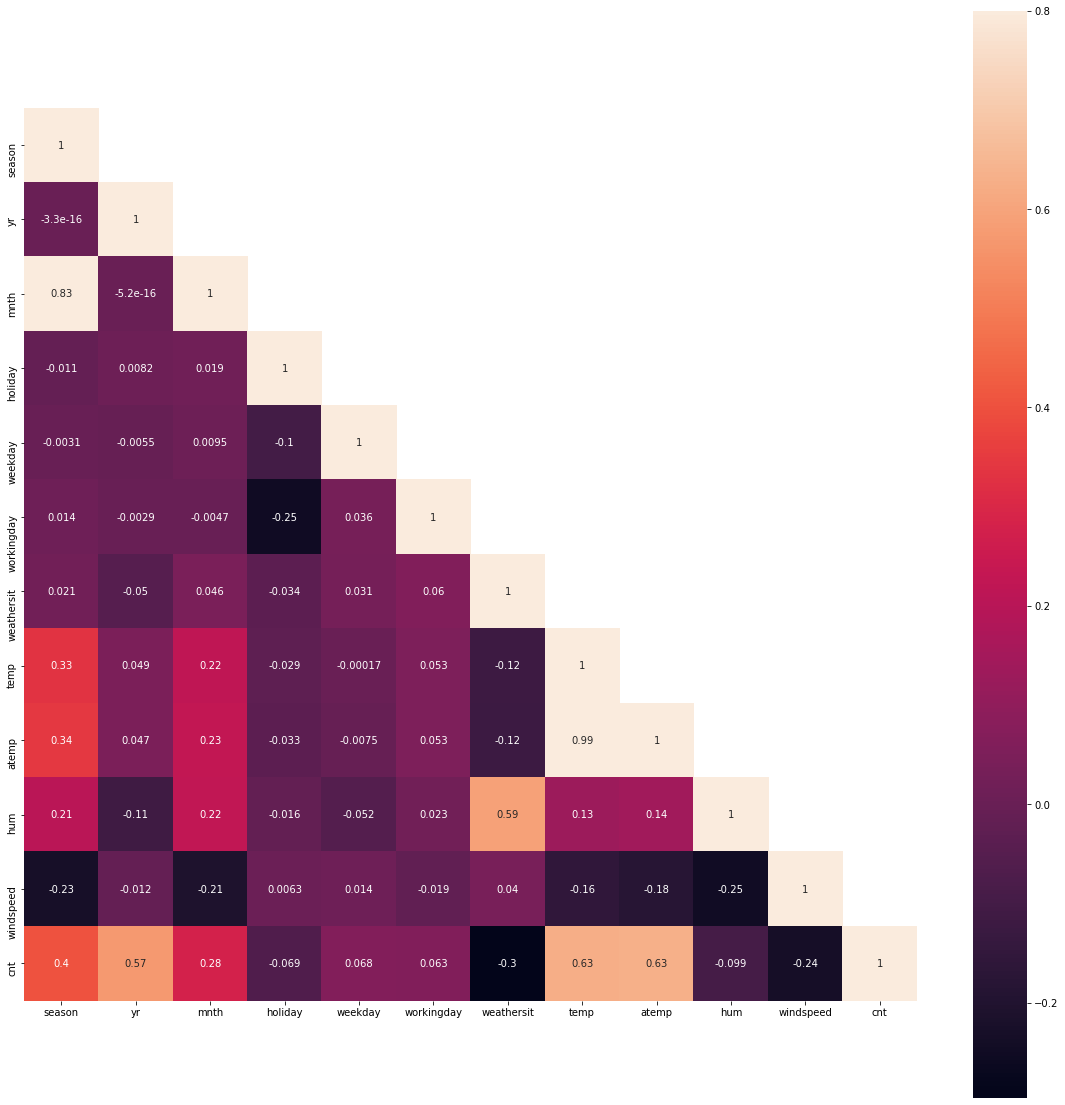

In [32]:
'''fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(bike.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()'''

mask = np.array(bike.corr())
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(bike.corr(), mask=mask,vmax=.8, square=True,annot=True)
plt.show()

##### Observation: Independent variables temp column and atemp have very high correleation .99 almost 1. Which means, if these both variables are used could cause multicollinearity issue. Hence, dropping temp column.

In [33]:
del bike['atemp']

### COMPARING CONTINUOUS VARIABLES

In [34]:
bike_sel = bike[['temp','hum','windspeed','cnt']]

In [35]:
bike_sel.corr()

,temp,hum,windspeed,cnt
temp,1.000000,0.128565,-0.158186,0.627044
hum,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.627044,-0.098543,-0.235132,1.000000


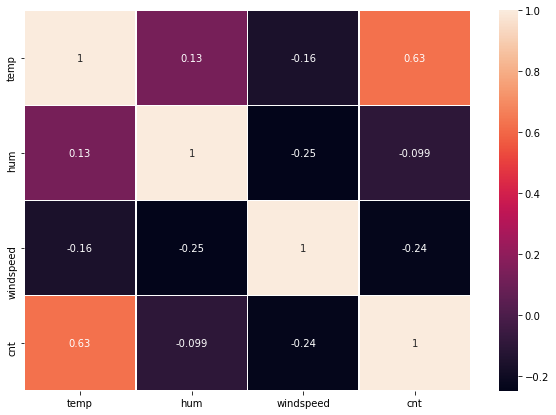

In [36]:
fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(bike_sel.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

##### Observation: atemp seems to be higher correlation with cnt. We will be construct a simple linear regression with atemp first.

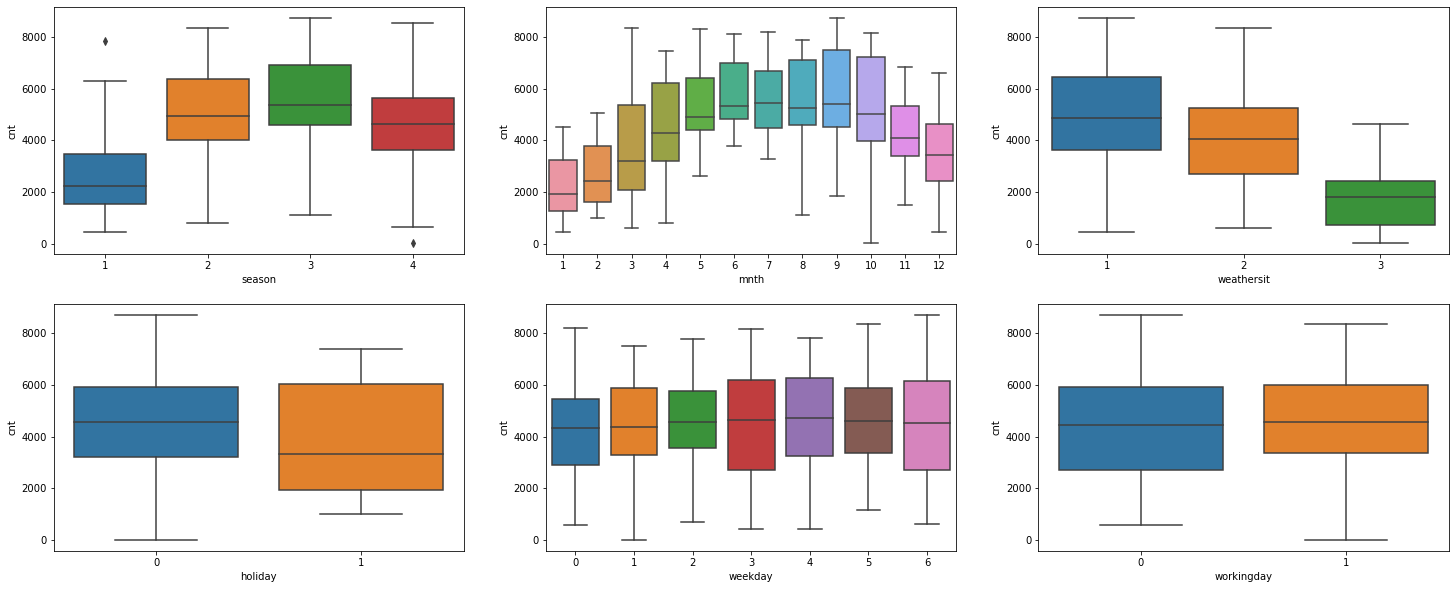

In [37]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

### DUMMY VARIABLES FROM CATEGORICAL VARIABLES

In [38]:
bike.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [39]:
bike.weathersit.unique()

array([2, 1, 3])

##### Observation: weathersit has only three unique values. Using weathersit creating dummy columns misty and stormy. 1 for Misty(option=2) will indicate its misty. 1 for stormy(option=3) will indicate its stormy. 0 for misty and 0 for stormy will indicate clear(option=1) weather. 1 for stormy and 1 for misty will indicate Heavy rain(option=4). Data only has information on clear, mist and thunder storrm. So no need create any new column Heavy rain.

In [40]:
weather_type = pd.get_dummies(bike.weathersit)

In [41]:
#?pd.get_dummies
bike = pd.concat([bike,weather_type], axis=1)


In [42]:
bike.rename(columns = {1:'clear'}, inplace = True)
bike.rename(columns = {2:'misty'}, inplace = True)
bike.rename(columns = {3:'stormy'}, inplace = True)

In [43]:
del bike['weathersit']

In [44]:
bike.season.unique()

array([1, 2, 3, 4])

In [45]:
season_type = pd.get_dummies(bike.season)

In [46]:
bike = pd.concat([bike,season_type], axis=1)

In [47]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,clear,misty,stormy,1,2,3,4
0,1,0,1,0,6,0,14.110847,80.5833,10.749882,985,0,1,0,1,0,0,0
1,1,0,1,0,0,0,14.902598,69.6087,16.652113,801,0,1,0,1,0,0,0
2,1,0,1,0,1,1,8.050924,43.7273,16.636703,1349,1,0,0,1,0,0,0
3,1,0,1,0,2,1,8.200000,59.0435,10.739832,1562,1,0,0,1,0,0,0
4,1,0,1,0,3,1,9.305237,43.6957,12.522300,1600,1,0,0,1,0,0,0


In [48]:
bike.rename(columns = {1:'spring'}, inplace = True)
bike.rename(columns = {2:'summer'}, inplace = True)
bike.rename(columns = {3:'fall'}, inplace = True)
bike.rename(columns = {4:'winter'}, inplace = True)

In [49]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,clear,misty,stormy,spring,summer,fall,winter
0,1,0,1,0,6,0,14.110847,80.5833,10.749882,985,0,1,0,1,0,0,0
1,1,0,1,0,0,0,14.902598,69.6087,16.652113,801,0,1,0,1,0,0,0
2,1,0,1,0,1,1,8.050924,43.7273,16.636703,1349,1,0,0,1,0,0,0
3,1,0,1,0,2,1,8.200000,59.0435,10.739832,1562,1,0,0,1,0,0,0
4,1,0,1,0,3,1,9.305237,43.6957,12.522300,1600,1,0,0,1,0,0,0


In [50]:
del bike['season']

In [51]:
del bike['spring']

In [52]:
bike.yr.unique()

array([0, 1])

##### Observation: yr already has categorical value as 0 and 1. So, dummy creation of yr is not required.

In [53]:
bike.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [54]:
mnth_type = pd.get_dummies(bike.mnth)

In [55]:
bike = pd.concat([bike,mnth_type], axis=1)

In [56]:
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,clear,...,3,4,5,6,7,8,9,10,11,12
0,0,1,0,6,0,14.110847,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,14.902598,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,8.050924,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,2,1,8.200000,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,3,1,9.305237,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [57]:
bike.rename(columns = {1:'jan'}, inplace = True)
bike.rename(columns = {2:'feb'}, inplace = True)
bike.rename(columns = {3:'mar'}, inplace = True)
bike.rename(columns = {4:'apr'}, inplace = True)
bike.rename(columns = {5:'may'}, inplace = True)
bike.rename(columns = {6:'jun'}, inplace = True)
bike.rename(columns = {7:'jul'}, inplace = True)
bike.rename(columns = {8:'aug'}, inplace = True)
bike.rename(columns = {9:'sep'}, inplace = True)
bike.rename(columns = {10:'oct'}, inplace = True)
bike.rename(columns = {11:'nov'}, inplace = True)
bike.rename(columns = {12:'dec'}, inplace = True)

In [58]:
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,clear,...,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,1,0,6,0,14.110847,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,14.902598,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,8.050924,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,2,1,8.200000,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,3,1,9.305237,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [59]:
del bike['mnth']

In [60]:
del bike['jan']

In [61]:
bike.head()

,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,clear,misty,...,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,0,6,0,14.110847,80.5833,10.749882,985,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,14.902598,69.6087,16.652113,801,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
bike.holiday.unique()

array([0, 1])

##### Observation: holiday already has categorical value as 0 and 1. So, dummy creation of holiday is not required.

In [63]:
bike.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5])

In [64]:
weekday_type = pd.get_dummies(bike.weekday)
bike = pd.concat([bike,weekday_type], axis=1)

In [65]:
bike.head()

,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,clear,misty,...,oct,nov,dec,0,1,2,3,4,5,6
0,0,0,6,0,14.110847,80.5833,10.749882,985,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,14.902598,69.6087,16.652113,801,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,1,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,2,1,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,3,1,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,0,0


In [66]:
bike.rename(columns = {0:'tue'}, inplace = True)
bike.rename(columns = {1:'wed'}, inplace = True)
bike.rename(columns = {2:'thu'}, inplace = True)
bike.rename(columns = {3:'fri'}, inplace = True)
bike.rename(columns = {4:'sat'}, inplace = True)
bike.rename(columns = {5:'sun'}, inplace = True)
bike.rename(columns = {6:'mon'}, inplace = True)

In [67]:
del bike['weekday']

In [68]:
del bike['tue']

In [69]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,clear,misty,stormy,...,sep,oct,nov,dec,wed,thu,fri,sat,sun,mon
0,0,0,0,14.110847,80.5833,10.749882,985,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [70]:
bike.workingday.unique()

array([0, 1])

In [71]:
bike[bike.workingday == 0][['mon','thu','wed','fri','sat','sun']]

,mon,thu,wed,fri,sat,sun
0,1,0,0,0,0,0
1,0,0,0,0,0,0
7,1,0,0,0,0,0
8,0,0,0,0,0,0
14,1,0,0,0,0,0
...,...,...,...,...,...,...
720,1,0,0,0,0,0
721,0,0,0,0,0,0
723,0,1,0,0,0,0
727,1,0,0,0,0,0


In [72]:
#bike[(bike.workingday == 0) & ((bike.sun == 1) | (bike.sat == 1))][['mon','tue','thu','wed','fri','sat','sun']]


In [73]:
#bike[(bike.workingday == 0) & (bike.sun == 0) & (bike.sat == 0)][['mon','tue','thu','wed','fri','sat','sun']]


# SIMPLE LINEAR REGRESSION

In [74]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

##### MODEL CREATION
##### considering atemp as the independent variable and cnt as the dependent variable

In [75]:

X = bike.temp
y = bike.cnt

##### TRAIN-TEST SPLIT
##### splitting the data into 7:3 ratio, where train will have 70 percent of dat and test will have 30 percent of data

In [76]:

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size=0.70,
                                                    random_state=100)

In [77]:
X_train.shape,y.shape

((510,), (730,))

In [78]:
bike.shape

(730, 30)

##### adding constant

In [79]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,temp
576,1.0,29.246653
426,1.0,16.980847
728,1.0,10.489153
482,1.0,15.443347
111,1.0,13.803347


##### fitting the model

In [80]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    1080.739991
temp      169.313394
dtype: float64

In [81]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           2.46e-61
Time:                        16:46:58   Log-Likelihood:                -4449.7
No. Observations:                 510   AIC:                             8903.
Df Residuals:                     508   BIC:                             8912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1080.7400    190.751      5.666      0.000     705.982    1455.498
temp         169.3134      8.899     19.026      0.000     151.830     186.797
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         62.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Observation: coefficients of constant and atemp seems to be correct. p-value of both const and x variable is 0, which means both of the coeffiecient are significant. R-squared being .42 means only 42 percent of the variance in cnt is explained by atemp. p(F-statisitcs) states is low.

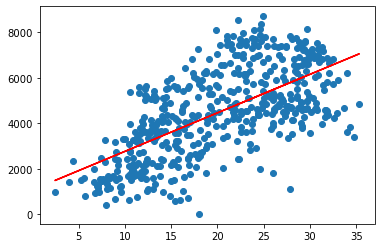

In [82]:
plt.scatter(X_train, y_train)
y_train_pred = lr_model.predict(X_train_sm)
plt.plot(X_train, y_train_pred, 'r')
plt.show()

##### RESIDUAL ANALYSIS

In [83]:
y_train.shape, y_train_pred.shape

((510,), (510,))

In [84]:
res = y_train - y_train_pred

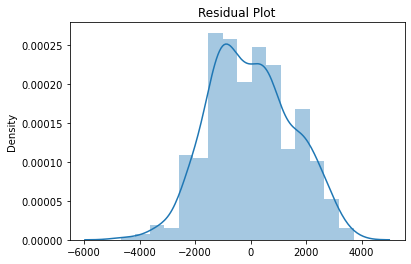

In [85]:
plt.figure()
sns.distplot(res)
plt.title('Residual Plot')
plt.show()

##### looking for patterns in residual

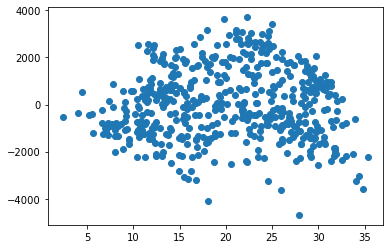

In [86]:
plt.scatter(X_train, res)
plt.show()

##### Analysis: The mean of the residual is close to 0 as all the residual are scattered around 0. The plot does not show any pattern. Residuals are normally distributed.

##### PREDICTIONS ON THE TEST SET

In [87]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)

##### R-SQUARED

In [88]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [89]:
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
r2

0.33356468576165654

In [90]:
r2 = r2_score(y_true = y_train, y_pred = y_train_pred)
r2

0.4160873499525738

##### Observation: the R2 on the test set is 34 percent and on training set is 41 percent

##### MEAN SQUARED ERROR

In [91]:
mean_squared_error(y_true = y_train, y_pred = y_train_pred)

2217488.38304288

In [92]:
mean_squared_error(y_true = y_test, y_pred = y_test_pred)

2407437.67902901

##### TEST SET VISUALISATION

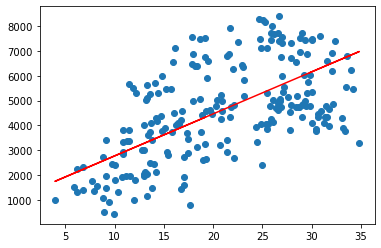

In [93]:
plt.scatter(X_test, y_test)
y_train_pred = lr_model.predict(X_test_sm)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [94]:
X_hum = bike.hum
y_hum = bike.cnt

X_hum_train, X_hum_test, y_hum_train, y_hum_test = train_test_split(
    X_hum, 
    y_hum, 
    train_size=0.70, 
    random_state=100)

X_hum_train_sm = sm.add_constant(X_hum_train)
X_hum_train_sm.head()



,const,hum
576,1.0,70.4167
426,1.0,62.1250
728,1.0,48.3333
482,1.0,48.9583
111,1.0,72.9583


In [95]:
lr_hum = sm.OLS(y_hum_train, X_hum_train_sm)
lr_hum_model = lr_hum.fit()
lr_hum_model.params

const    4996.841194
hum        -8.103198
dtype: float64

In [96]:
lr_hum_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.762
Date:                Wed, 12 Oct 2022   Prob (F-statistic):              0.185
Time:                        16:47:03   Log-Likelihood:                -4586.0
No. Observations:                 510   AIC:                             9176.
Df Residuals:                     508   BIC:                             9184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4996.8412    394.883     12.654      0.000    4221.036    5772.646
hum           -8.1032      6.104     -1.327      0.185     -20.096       3.890
==============================================================================
Omnibus:                       49.368   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.674
Skew:                          -0.077   Prob(JB):                     0.000395
Kurtosis:                       2.155   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

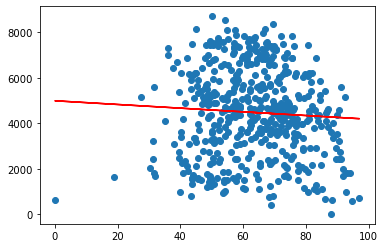

In [97]:
plt.scatter(X_hum_train, y_hum_train)
y_hum_train_pred = lr_hum_model.predict(X_hum_train_sm)
plt.plot(X_hum_train, y_hum_train_pred, 'r')
plt.show()

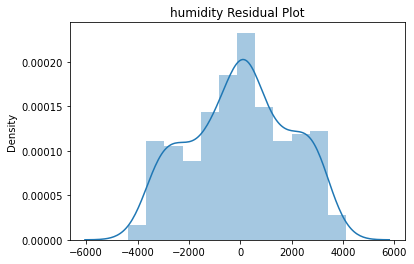

In [98]:
res_hum = y_hum_train - y_hum_train_pred
plt.figure()
sns.distplot(res_hum)
plt.title('humidity Residual Plot')
plt.show()

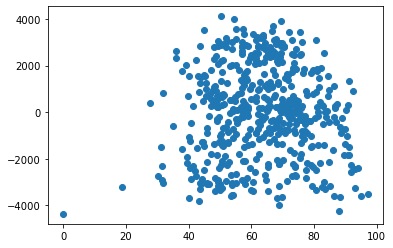

In [99]:
plt.scatter(X_hum_train, res_hum)
plt.show()

In [100]:
X_hum_test_sm = sm.add_constant(X_hum_test)
y_hum_test_pred = lr_model.predict(X_hum_test_sm)

In [101]:
r2_hum = r2_score(y_true = y_hum_test, y_pred = y_hum_test_pred)
r2_hum

-15.719948429611868

In [102]:
r2_hum= r2_score(y_true = y_hum_train, y_pred = y_hum_train_pred)
r2_hum

0.00345664298721593

In [103]:
X_wind = bike.windspeed
y_wind = bike.cnt

X_wind_train, X_wind_test, y_wind_train, y_wind_test = train_test_split(
    X_wind, 
    y_wind, 
    train_size=0.70, 
    random_state=100)

X_wind_train_sm = sm.add_constant(X_wind_train)
X_wind_train_sm.head()

,const,windspeed
576,1.0,11.083475
426,1.0,10.792293
728,1.0,23.500518
482,1.0,8.708325
111,1.0,14.707907


In [104]:
lr_wind = sm.OLS(y_wind_train, X_wind_train_sm)
lr_wind_model = lr_wind.fit()
lr_wind_model.params

const        5682.461009
windspeed     -93.270899
dtype: float64

In [105]:
lr_wind_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     34.75
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           6.83e-09
Time:                        16:47:05   Log-Likelihood:                -4570.0
No. Observations:                 510   AIC:                             9144.
Df Residuals:                     508   BIC:                             9152.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5682.4610    219.627     25.873      0.000    5250.973    6113.949
windspeed    -93.2709     15.822     -5.895      0.000    -124.355     -62.186
==============================================================================
Omnibus:                       33.938   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.488
Skew:                          -0.003   Prob(JB):                      0.00194
Kurtosis:                       2.233   Cond. No.                         36.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

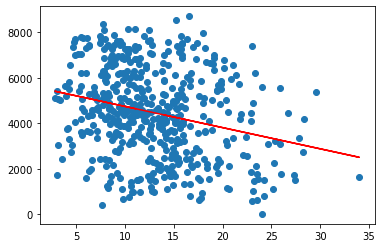

In [106]:
plt.scatter(X_wind_train, y_wind_train)
y_wind_train_pred = lr_wind_model.predict(X_wind_train_sm)
plt.plot(X_wind_train, y_wind_train_pred, 'r')
plt.show()

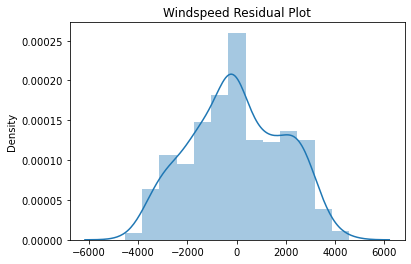

In [107]:
res_wind = y_wind_train - y_wind_train_pred
plt.figure()
sns.distplot(res_wind)
plt.title('Windspeed Residual Plot')
plt.show()

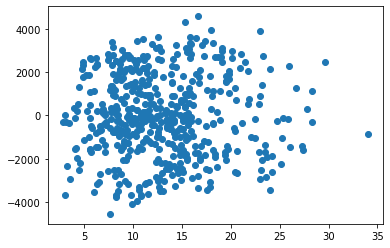

In [108]:
plt.scatter(X_wind_train, res_wind)
plt.show()

In [109]:
X_wind_test_sm = sm.add_constant(X_wind_test)
y_wind_test_pred = lr_model.predict(X_wind_test_sm)

In [110]:
r2_wind = r2_score(y_true = y_wind_test, y_pred = y_wind_test_pred)
r2_hum

0.00345664298721593

In [111]:
r2_wind= r2_score(y_true = y_wind_train, y_pred = y_wind_train_pred)
r2_wind

0.06402817833478813

# Multiple Linear Regression

In [112]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'clear', 'misty', 'stormy', 'summer', 'fall', 'winter', 'feb', 'mar',
       'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'wed',
       'thu', 'fri', 'sat', 'sun', 'mon'],
      dtype='object')

##### VISUALISING CONTINUOUS VARIABLES

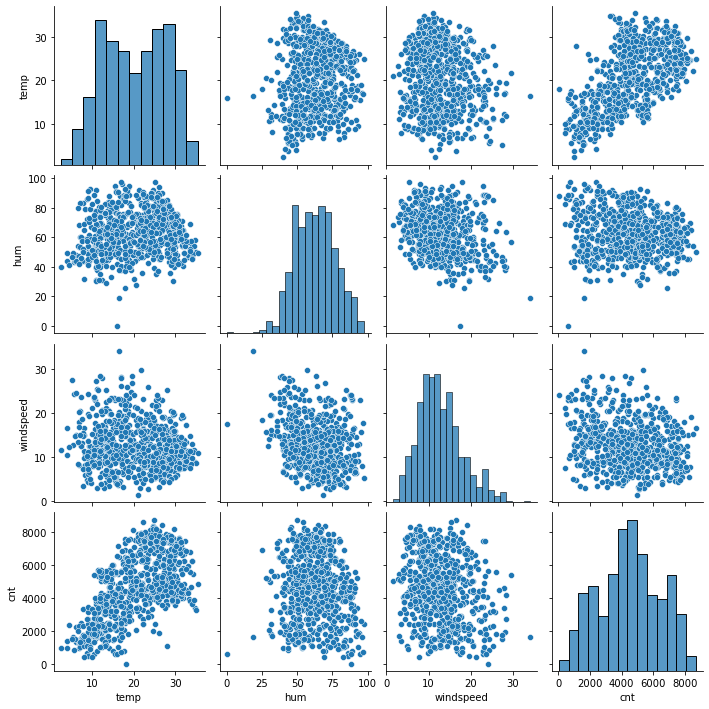

In [113]:
sns.pairplot(bike[['temp', 'hum', 'windspeed', 'cnt']])
plt.show()

##### Observation: temp has positive corelation with cnt column. Windspeed and temp has negative corelation with cnt. The data has some variables which are positively corelated with price. So, this data can be considered for Linear regression.

### TRAIN TEST SPLIT

In [114]:
df_train, df_test = train_test_split(bike, train_size=0.7, random_state=100)

In [115]:
df_train.shape, df_test.shape

((510, 30), (220, 30))

### SCALING
##### Considering min-max scaling for this modelling

In [116]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
scaler = MinMaxScaler()

##### performing scaling on continuous variables. Categorical variables are already converted to dummy variables, so there is no need to perform min-max scaling on those variables.

In [118]:
con_vars = ['temp', 'hum', 'windspeed', 'cnt']

In [119]:
df_train[con_vars] = scaler.fit_transform(df_train[con_vars])

In [120]:
df_train[con_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


### TRAINING THE MODEL

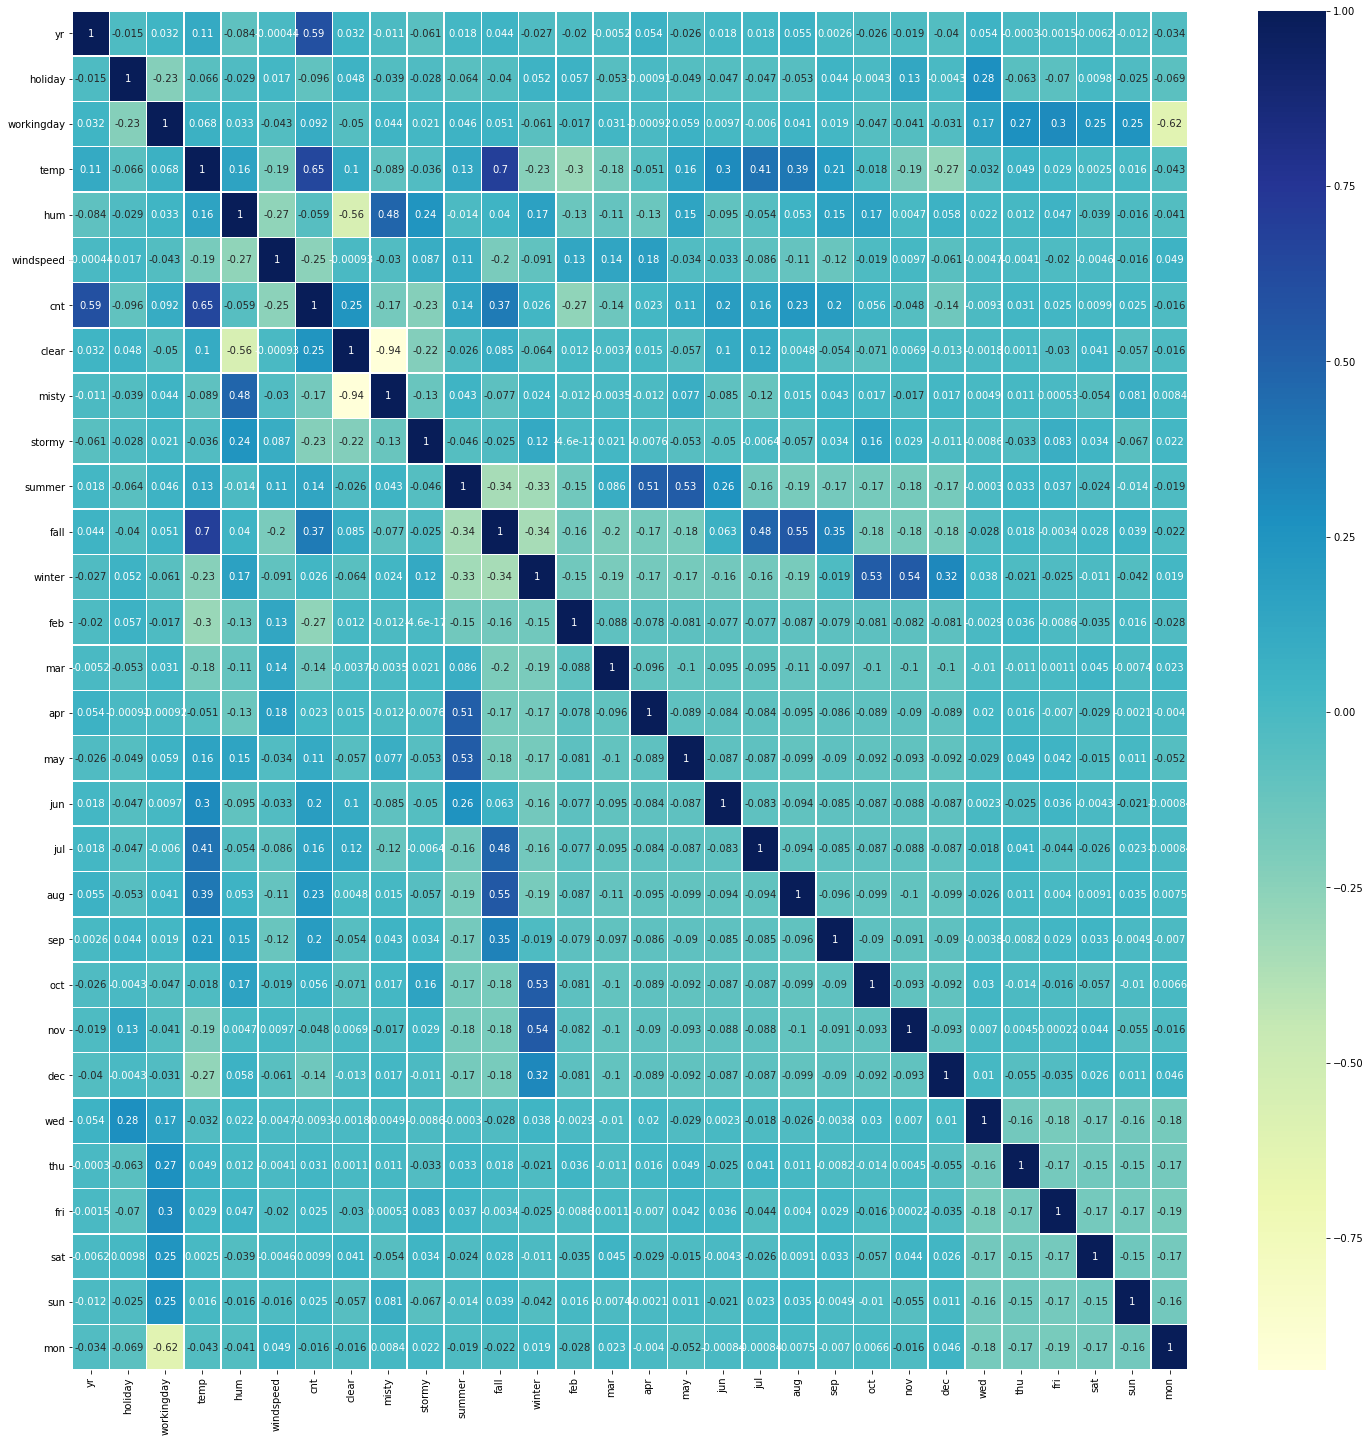

In [121]:
fig, ax = plt.subplots(figsize=(25,25)) 
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, ax=ax, cmap = 'YlGnBu')
plt.show()

In [122]:
y_train = df_train.pop('cnt')
X_train = df_train

In [123]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

##### adding a constant

In [124]:
x_train_sm = sm.add_constant(X_train['temp'])

In [125]:
x_train_sm.head()

,const,temp
576,1.0,0.815169
426,1.0,0.442393
728,1.0,0.245101
482,1.0,0.395666
111,1.0,0.345824


### MODEL 1

In [126]:
lr = sm.OLS(y_train, X_train_sm)

In [127]:
lr_model = lr.fit()

In [128]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           2.46e-61
Time:                        16:47:14   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1218      0.022      5.550      0.000       0.079       0.165
temp           0.0195      0.001     19.026      0.000       0.017       0.021
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         62.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### MODEL 2

In [129]:
X_train_sm = sm.add_constant(X_train[['temp', 'fall']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     189.5
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           3.55e-62
Time:                        16:47:14   Log-Likelihood:                 181.23
No. Observations:                 510   AIC:                            -356.5
Df Residuals:                     507   BIC:                            -343.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1331      0.022      5.935      0.000       0.089       0.177
temp           0.7452      0.047     16.007      0.000       0.654       0.837
fall          -0.0767      0.024     -3.213      0.001      -0.124      -0.030
==============================================================================
Omnibus:                        5.941   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                4.217
Skew:                           0.074   Prob(JB):                        0.121
Kurtosis:                       2.580   Cond. No.                         8.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### MODEL 3

In [130]:
X_train_sm = sm.add_constant(X_train[['temp', 'fall','clear']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     144.6
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           1.12e-67
Time:                        16:47:14   Log-Likelihood:                 196.81
No. Observations:                 510   AIC:                            -385.6
Df Residuals:                     506   BIC:                            -368.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0882      0.023      3.803      0.000       0.043       0.134
temp           0.7303      0.045     16.130      0.000       0.641       0.819
fall          -0.0793      0.023     -3.423      0.001      -0.125      -0.034
clear          0.0858      0.015      5.646      0.000       0.056       0.116
==============================================================================
Omnibus:                        9.088   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                6.060
Skew:                           0.117   Prob(JB):                       0.0483
Kurtosis:                       2.520   Cond. No.                         9.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### MODEL 4

In [131]:
X_train_sm = sm.add_constant(X_train[['temp', 'clear']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     206.7
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           2.22e-66
Time:                        16:47:14   Log-Likelihood:                 190.97
No. Observations:                 510   AIC:                            -375.9
Df Residuals:                     507   BIC:                            -363.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1259      0.021      6.101      0.000       0.085       0.166
temp           0.6227      0.033     18.916      0.000       0.558       0.687
clear          0.0847      0.015      5.519      0.000       0.055       0.115
==============================================================================
Omnibus:                        8.295   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                5.773
Skew:                           0.123   Prob(JB):                       0.0558
Kurtosis:                       2.541   Cond. No.                         6.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### MODEL 5

In [132]:
X_train_sm = sm.add_constant(X_train[['temp', 'clear','sep']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     141.5
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           1.42e-66
Time:                        16:47:14   Log-Likelihood:                 194.24
No. Observations:                 510   AIC:                            -380.5
Df Residuals:                     506   BIC:                            -363.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1281      0.021      6.239      0.000       0.088       0.168
temp           0.6043      0.034     18.031      0.000       0.538       0.670
clear          0.0877      0.015      5.730      0.000       0.058       0.118
sep            0.0708      0.028      2.556      0.011       0.016       0.125
==============================================================================
Omnibus:                        8.471   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                5.553
Skew:                           0.093   Prob(JB):                       0.0622
Kurtosis:                       2.524   Cond. No.                         6.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### MOLEL 6

In [133]:
X_train_sm = sm.add_constant(X_train[['temp', 'clear','sep', 'workingday']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           3.75e-66
Time:                        16:47:14   Log-Likelihood:                 195.85
No. Observations:                 510   AIC:                            -381.7
Df Residuals:                     505   BIC:                            -360.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1104      0.023      4.853      0.000       0.066       0.155
temp           0.6000      0.034     17.895      0.000       0.534       0.666
clear          0.0893      0.015      5.835      0.000       0.059       0.119
sep            0.0708      0.028      2.559      0.011       0.016       0.125
workingday     0.0282      0.016      1.789      0.074      -0.003       0.059
==============================================================================
Omnibus:                        6.474   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                4.763
Skew:                           0.110   Prob(JB):                       0.0924
Kurtosis:                       2.581   Cond. No.                         7.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### MODEL 7

In [134]:
X_train_sm = sm.add_constant(X_train[['temp', 'clear', 'windspeed']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     148.5
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           5.03e-69
Time:                        16:47:14   Log-Likelihood:                 199.94
No. Observations:                 510   AIC:                            -391.9
Df Residuals:                     506   BIC:                            -374.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1989      0.027      7.485      0.000       0.147       0.251
temp           0.5963      0.033     18.089      0.000       0.532       0.661
clear          0.0859      0.015      5.689      0.000       0.056       0.116
windspeed     -0.1857      0.044     -4.256      0.000      -0.271      -0.100
==============================================================================
Omnibus:                       10.096   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                7.203
Skew:                           0.169   Prob(JB):                       0.0273
Kurtosis:                       2.526   Cond. No.                         9.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### MODEL 8

In [135]:
X_train_sm = sm.add_constant(X_train[['temp', 'clear', 'windspeed', 'jul']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     119.8
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           8.71e-72
Time:                        16:47:14   Log-Likelihood:                 209.01
No. Observations:                 510   AIC:                            -408.0
Df Residuals:                     505   BIC:                            -386.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1735      0.027      6.475      0.000       0.121       0.226
temp           0.6566      0.035     18.573      0.000       0.587       0.726
clear          0.0911      0.015      6.117      0.000       0.062       0.120
windspeed     -0.1876      0.043     -4.373      0.000      -0.272      -0.103
jul           -0.1268      0.030     -4.277      0.000      -0.185      -0.069
==============================================================================
Omnibus:                       13.775   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.801
Skew:                           0.174   Prob(JB):                       0.0123
Kurtosis:                       2.458   Cond. No.                         9.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### MODEL 9

In [136]:
X_train_sm = sm.add_constant(X_train[['temp', 'clear', 'windspeed', 'jul', 'hum']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     102.1
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           2.93e-74
Time:                        16:47:14   Log-Likelihood:                 217.31
No. Observations:                 510   AIC:                            -422.6
Df Residuals:                     504   BIC:                            -397.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3682      0.055      6.756      0.000       0.261       0.475
temp           0.6911      0.036     19.290      0.000       0.621       0.761
clear          0.0471      0.018      2.588      0.010       0.011       0.083
windspeed     -0.2402      0.044     -5.438      0.000      -0.327      -0.153
jul           -0.1401      0.029     -4.769      0.000      -0.198      -0.082
hum           -0.2581      0.063     -4.083      0.000      -0.382      -0.134
==============================================================================
Omnibus:                       10.064   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.921
Skew:                           0.151   Prob(JB):                       0.0314
Kurtosis:                       2.516   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### MODEL 10

In [137]:
X_train_sm = sm.add_constant(X_train[['temp', 'clear', 'windspeed', 'jul', 'hum', 'stormy']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     90.78
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           6.23e-77
Time:                        16:47:15   Log-Likelihood:                 226.01
No. Observations:                 510   AIC:                            -438.0
Df Residuals:                     503   BIC:                            -408.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3388      0.054      6.263      0.000       0.233       0.445
temp           0.6828      0.035     19.337      0.000       0.613       0.752
clear          0.0416      0.018      2.318      0.021       0.006       0.077
windspeed     -0.2139      0.044     -4.872      0.000      -0.300      -0.128
jul           -0.1338      0.029     -4.623      0.000      -0.191      -0.077
hum           -0.2063      0.063     -3.252      0.001      -0.331      -0.082
stormy        -0.1801      0.043     -4.179      0.000      -0.265      -0.095
==============================================================================
Omnibus:                       18.804   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.264
Skew:                           0.206   Prob(JB):                      0.00358
Kurtosis:                       2.400   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### MODEL 11

In [138]:
X_train_sm = sm.add_constant(X_train[['temp', 'windspeed', 'jul', 'hum', 'stormy']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     106.9
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           8.12e-77
Time:                        16:47:15   Log-Likelihood:                 223.30
No. Observations:                 510   AIC:                            -434.6
Df Residuals:                     504   BIC:                            -409.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4158      0.043      9.695      0.000       0.332       0.500
temp           0.6977      0.035     20.008      0.000       0.629       0.766
windspeed     -0.2287      0.044     -5.242      0.000      -0.314      -0.143
jul           -0.1335      0.029     -4.594      0.000      -0.191      -0.076
hum           -0.2893      0.053     -5.505      0.000      -0.393      -0.186
stormy        -0.1873      0.043     -4.340      0.000      -0.272      -0.103
==============================================================================
Omnibus:                       19.970   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.491
Skew:                           0.200   Prob(JB):                      0.00320
Kurtosis:                       2.383   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### MODEL 12

In [139]:
X_train_sm = sm.add_constant(X_train[['temp', 'yr', 'windspeed', 'jul', 'hum', 'stormy']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     272.8
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.35e-154
Time:                        16:47:16   Log-Likelihood:                 408.11
No. Observations:                 510   AIC:                            -802.2
Df Residuals:                     503   BIC:                            -772.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2846      0.030      9.356      0.000       0.225       0.344
temp           0.6264      0.024     25.578      0.000       0.578       0.675
yr             0.2271      0.010     23.136      0.000       0.208       0.246
windspeed     -0.2271      0.030     -7.471      0.000      -0.287      -0.167
jul           -0.1135      0.020     -5.599      0.000      -0.153      -0.074
hum           -0.2101      0.037     -5.712      0.000      -0.282      -0.138
stormy        -0.1666      0.030     -5.539      0.000      -0.226      -0.108
==============================================================================
Omnibus:                        4.871   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.682
Skew:                          -0.227   Prob(JB):                       0.0962
Kurtosis:                       3.120   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### MODEL 13
##### adding all the variables

In [140]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'clear',
       'misty', 'stormy', 'summer', 'fall', 'winter', 'feb', 'mar', 'apr',
       'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'wed', 'thu',
       'fri', 'sat', 'sun', 'mon'],
      dtype='object')

In [141]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          3.00e-181
Time:                        16:47:16   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0534      0.027      2.009      0.045       0.001       0.106
yr             0.2324      0.008     28.819      0.000       0.217       0.248
holiday       -0.0423      0.024     -1.792      0.074      -0.089       0.004
workingday     0.0438      0.009      4.680      0.000       0.025       0.062
temp           0.4454      0.046      9.628      0.000       0.354       0.536
hum           -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed     -0.1860      0.026     -7.226      0.000      -0.237      -0.135
clear          0.1229      0.009     13.931      0.000       0.106       0.140
misty          0.0634      0.012      5.436      0.000       0.040       0.086
stormy        -0.1329      0.022     -5.955      0.000      -0.177      -0.089
summer         0.0878      0.024      3.721      0.000       0.041       0.134
fall           0.0448      0.030      1.496      0.135      -0.014       0.104
winter         0.1525      0.026      5.873      0.000       0.101       0.203
feb            0.0309      0.021      1.497      0.135      -0.010       0.071
mar            0.0646      0.022      2.888      0.004       0.021       0.109
apr            0.0633      0.034      1.885      0.060      -0.003       0.129
may            0.0880      0.036      2.433      0.015       0.017       0.159
jun            0.0679      0.039      1.752      0.080      -0.008       0.144
jul            0.0295      0.044      0.672      0.502      -0.057       0.116
aug            0.0837      0.042      2.009      0.045       0.002       0.166
sep            0.1493      0.037      3.997      0.000       0.076       0.223
oct            0.0709      0.034      2.055      0.040       0.003       0.139
nov            0.0234      0.033      0.714      0.476      -0.041       0.088
dec            0.0190      0.026      0.718      0.473      -0.033       0.071
wed           -0.0099      0.010     -1.021      0.308      -0.029       0.009
thu           -0.0069      0.011     -0.621      0.535      -0.029       0.015
fri            0.0055      0.011      0.524      0.600      -0.015       0.026
sat            0.0019      0.011      0.172      0.864      -0.020       0.023
sun            0.0110      0.011      0.987      0.324      -0.011       0.033
mon            0.0542      0.015      3.732      0.000       0.026       0.083
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     1.20e+16
==============================================================================

N

##### vif calculation

In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [143]:
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) 
              for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
26,sat,inf
27,sun,inf
23,wed,inf
1,holiday,inf
25,fri,inf
24,thu,inf
2,workingday,inf
6,clear,37.62
7,misty,27.55
10,fall,11.31


### MODEL 14

In [144]:
X = X_train.drop('sat', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          3.00e-181
Time:                        16:47:17   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0534      0.027      2.009      0.045       0.001       0.106
yr             0.2324      0.008     28.819      0.000       0.217       0.248
holiday       -0.0404      0.030     -1.346      0.179      -0.099       0.019
workingday     0.0457      0.015      3.016      0.003       0.016       0.075
temp           0.4454      0.046      9.628      0.000       0.354       0.536
hum           -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed     -0.1860      0.026     -7.226      0.000      -0.237      -0.135
clear          0.1229      0.009     13.931      0.000       0.106       0.140
misty          0.0634      0.012      5.436      0.000       0.040       0.086
stormy        -0.1329      0.022     -5.955      0.000      -0.177      -0.089
summer         0.0878      0.024      3.721      0.000       0.041       0.134
fall           0.0448      0.030      1.496      0.135      -0.014       0.104
winter         0.1525      0.026      5.873      0.000       0.101       0.203
feb            0.0309      0.021      1.497      0.135      -0.010       0.071
mar            0.0646      0.022      2.888      0.004       0.021       0.109
apr            0.0633      0.034      1.885      0.060      -0.003       0.129
may            0.0880      0.036      2.433      0.015       0.017       0.159
jun            0.0679      0.039      1.752      0.080      -0.008       0.144
jul            0.0295      0.044      0.672      0.502      -0.057       0.116
aug            0.0837      0.042      2.009      0.045       0.002       0.166
sep            0.1493      0.037      3.997      0.000       0.076       0.223
oct            0.0709      0.034      2.055      0.040       0.003       0.139
nov            0.0234      0.033      0.714      0.476      -0.041       0.088
dec            0.0190      0.026      0.718      0.473      -0.033       0.071
wed           -0.0118      0.015     -0.780      0.436      -0.042       0.018
thu           -0.0088      0.015     -0.571      0.568      -0.039       0.022
fri            0.0036      0.015      0.248      0.804      -0.025       0.032
sun            0.0091      0.016      0.588      0.557      -0.021       0.040
mon            0.0542      0.015      3.732      0.000       0.026       0.083
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     6.48e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [145]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) 
              for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
6,clear,37.62
7,misty,27.55
10,fall,11.31
18,aug,9.80
17,jul,8.82
11,winter,8.15
3,temp,7.08
16,jun,6.90
9,summer,6.74
19,sep,6.70


### MODEL 15

In [146]:
X = X.drop('fri', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          2.95e-182
Time:                        16:47:18   Log-Likelihood:                 526.99
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0533      0.027      2.007      0.045       0.001       0.105
yr             0.2325      0.008     28.849      0.000       0.217       0.248
holiday       -0.0387      0.029     -1.326      0.185      -0.096       0.019
workingday     0.0477      0.013      3.717      0.000       0.022       0.073
temp           0.4452      0.046      9.635      0.000       0.354       0.536
hum           -0.1512      0.038     -3.927      0.000      -0.227      -0.076
windspeed     -0.1860      0.026     -7.234      0.000      -0.237      -0.136
clear          0.1228      0.009     13.945      0.000       0.106       0.140
misty          0.0633      0.012      5.437      0.000       0.040       0.086
stormy        -0.1329      0.022     -5.960      0.000      -0.177      -0.089
summer         0.0877      0.024      3.721      0.000       0.041       0.134
fall           0.0446      0.030      1.490      0.137      -0.014       0.103
winter         0.1525      0.026      5.878      0.000       0.102       0.203
feb            0.0310      0.021      1.503      0.133      -0.010       0.071
mar            0.0646      0.022      2.889      0.004       0.021       0.108
apr            0.0635      0.034      1.894      0.059      -0.002       0.129
may            0.0882      0.036      2.442      0.015       0.017       0.159
jun            0.0682      0.039      1.763      0.079      -0.008       0.144
jul            0.0298      0.044      0.680      0.497      -0.056       0.116
aug            0.0840      0.042      2.019      0.044       0.002       0.166
sep            0.1495      0.037      4.007      0.000       0.076       0.223
oct            0.0709      0.034      2.059      0.040       0.003       0.139
nov            0.0234      0.033      0.712      0.477      -0.041       0.088
dec            0.0189      0.026      0.714      0.475      -0.033       0.071
wed           -0.0137      0.013     -1.065      0.288      -0.039       0.012
thu           -0.0108      0.013     -0.821      0.412      -0.037       0.015
sun            0.0072      0.013      0.537      0.592      -0.019       0.033
mon            0.0542      0.015      3.737      0.000       0.026       0.083
==============================================================================
Omnibus:                       84.105   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.381
Skew:                          -0.802   Prob(JB):                     2.10e-51
Kurtosis:                       5.900   Cond. No.                     6.96e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.66e-29. This might indicate

In [147]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) 
              for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
6,clear,37.59
7,misty,27.54
10,fall,11.30
18,aug,9.79
17,jul,8.82
11,winter,8.15
3,temp,7.08
16,jun,6.89
9,summer,6.74
19,sep,6.70


### MODEL 16

In [148]:
X = X.drop('sun', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.8
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          3.19e-183
Time:                        16:47:18   Log-Likelihood:                 526.84
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -891.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0534      0.027      2.014      0.045       0.001       0.106
yr             0.2324      0.008     28.865      0.000       0.217       0.248
holiday       -0.0363      0.029     -1.260      0.208      -0.093       0.020
workingday     0.0499      0.012      4.105      0.000       0.026       0.074
temp           0.4448      0.046      9.635      0.000       0.354       0.536
hum           -0.1518      0.038     -3.949      0.000      -0.227      -0.076
windspeed     -0.1861      0.026     -7.241      0.000      -0.237      -0.136
clear          0.1231      0.009     13.994      0.000       0.106       0.140
misty          0.0640      0.012      5.528      0.000       0.041       0.087
stormy        -0.1336      0.022     -6.008      0.000      -0.177      -0.090
summer         0.0876      0.024      3.717      0.000       0.041       0.134
fall           0.0446      0.030      1.493      0.136      -0.014       0.103
winter         0.1526      0.026      5.889      0.000       0.102       0.204
feb            0.0313      0.021      1.518      0.130      -0.009       0.072
mar            0.0646      0.022      2.893      0.004       0.021       0.108
apr            0.0639      0.034      1.907      0.057      -0.002       0.130
may            0.0886      0.036      2.454      0.014       0.018       0.159
jun            0.0684      0.039      1.769      0.078      -0.008       0.144
jul            0.0304      0.044      0.696      0.487      -0.055       0.116
aug            0.0844      0.042      2.030      0.043       0.003       0.166
sep            0.1495      0.037      4.011      0.000       0.076       0.223
oct            0.0712      0.034      2.069      0.039       0.004       0.139
nov            0.0230      0.033      0.700      0.484      -0.041       0.087
dec            0.0190      0.026      0.718      0.473      -0.033       0.071
wed           -0.0160      0.012     -1.304      0.193      -0.040       0.008
thu           -0.0130      0.012     -1.044      0.297      -0.038       0.011
mon            0.0542      0.015      3.739      0.000       0.026       0.083
==============================================================================
Omnibus:                       83.749   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.918
Skew:                          -0.798   Prob(JB):                     2.65e-51
Kurtosis:                       5.901   Cond. No.                     6.95e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.64e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

In [149]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) 
              for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
6,clear,37.58
7,misty,27.49
10,fall,11.30
18,aug,9.79
17,jul,8.81
11,winter,8.15
3,temp,7.08
16,jun,6.89
9,summer,6.74
19,sep,6.70


### MODEL 17

In [150]:
X = X.drop('jul', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.6
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          3.71e-184
Time:                        16:47:19   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     485   BIC:                            -897.3
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0547      0.026      2.069      0.039       0.003       0.107
yr             0.2319      0.008     28.928      0.000       0.216       0.248
holiday       -0.0379      0.029     -1.318      0.188      -0.094       0.019
workingday     0.0494      0.012      4.072      0.000       0.026       0.073
temp           0.4636      0.037     12.383      0.000       0.390       0.537
hum           -0.1553      0.038     -4.079      0.000      -0.230      -0.081
windspeed     -0.1859      0.026     -7.239      0.000      -0.236      -0.135
clear          0.1231      0.009     14.004      0.000       0.106       0.140
misty          0.0644      0.012      5.573      0.000       0.042       0.087
stormy        -0.1327      0.022     -5.981      0.000      -0.176      -0.089
summer         0.0939      0.022      4.316      0.000       0.051       0.137
fall           0.0570      0.024      2.372      0.018       0.010       0.104
winter         0.1582      0.025      6.419      0.000       0.110       0.207
feb            0.0270      0.020      1.374      0.170      -0.012       0.066
mar            0.0557      0.018      3.043      0.002       0.020       0.092
apr            0.0494      0.026      1.882      0.060      -0.002       0.101
may            0.0716      0.027      2.693      0.007       0.019       0.124
jun            0.0467      0.023      2.047      0.041       0.002       0.091
aug            0.0584      0.018      3.198      0.001       0.023       0.094
sep            0.1272      0.019      6.671      0.000       0.090       0.165
oct            0.0573      0.028      2.045      0.041       0.002       0.112
nov            0.0114      0.028      0.404      0.686      -0.044       0.067
dec            0.0102      0.023      0.440      0.660      -0.035       0.056
wed           -0.0158      0.012     -1.292      0.197      -0.040       0.008
thu           -0.0128      0.012     -1.026      0.305      -0.037       0.012
mon            0.0542      0.014      3.738      0.000       0.026       0.083
==============================================================================
Omnibus:                       81.485   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.632
Skew:                          -0.784   Prob(JB):                     7.47e-49
Kurtosis:                       5.824   Cond. No.                     6.69e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.93e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [151]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) 
              for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
6,clear,37.43
7,misty,27.36
11,winter,7.38
10,fall,7.31
9,summer,5.75
3,temp,4.66
20,nov,4.11
8,stormy,3.98
19,oct,3.96
15,may,3.56


### MODEL 18

In [152]:
X = X.drop('nov', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.9
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          3.60e-185
Time:                        16:47:19   Log-Likelihood:                 526.50
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     486   BIC:                            -903.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0555      0.026      2.107      0.036       0.004       0.107
yr             0.2319      0.008     28.950      0.000       0.216       0.248
holiday       -0.0363      0.028     -1.277      0.202      -0.092       0.020
workingday     0.0494      0.012      4.080      0.000       0.026       0.073
temp           0.4615      0.037     12.460      0.000       0.389       0.534
hum           -0.1544      0.038     -4.065      0.000      -0.229      -0.080
windspeed     -0.1847      0.025     -7.245      0.000      -0.235      -0.135
clear          0.1234      0.009     14.125      0.000       0.106       0.141
misty          0.0645      0.012      5.593      0.000       0.042       0.087
stormy        -0.1324      0.022     -5.976      0.000      -0.176      -0.089
summer         0.0942      0.022      4.339      0.000       0.052       0.137
fall           0.0580      0.024      2.427      0.016       0.011       0.105
winter         0.1658      0.016     10.398      0.000       0.134       0.197
feb            0.0255      0.019      1.322      0.187      -0.012       0.063
mar            0.0544      0.018      3.021      0.003       0.019       0.090
apr            0.0480      0.026      1.847      0.065      -0.003       0.099
may            0.0706      0.026      2.670      0.008       0.019       0.123
jun            0.0458      0.023      2.019      0.044       0.001       0.090
aug            0.0572      0.018      3.178      0.002       0.022       0.093
sep            0.1242      0.018      7.073      0.000       0.090       0.159
oct            0.0488      0.018      2.649      0.008       0.013       0.085
dec            0.0037      0.017      0.221      0.825      -0.029       0.036
wed           -0.0161      0.012     -1.324      0.186      -0.040       0.008
thu           -0.0129      0.012     -1.037      0.300      -0.037       0.012
mon            0.0541      0.014      3.735      0.000       0.026       0.083
==============================================================================
Omnibus:                       81.161   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.909
Skew:                          -0.780   Prob(JB):                     1.07e-48
Kurtosis:                       5.821   Cond. No.                     7.23e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.36e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [153]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) 
              for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
6,clear,37.10
7,misty,27.23
10,fall,7.23
9,summer,5.74
3,temp,4.57
8,stormy,3.96
15,may,3.53
14,apr,3.20
11,winter,3.09
16,jun,2.38


### MODEL 19

In [154]:
X = X.drop('dec', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.7
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          3.23e-186
Time:                        16:47:20   Log-Likelihood:                 526.48
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     487   BIC:                            -909.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0558      0.026      2.126      0.034       0.004       0.107
yr             0.2318      0.008     28.978      0.000       0.216       0.248
holiday       -0.0366      0.028     -1.288      0.198      -0.092       0.019
workingday     0.0495      0.012      4.091      0.000       0.026       0.073
temp           0.4606      0.037     12.517      0.000       0.388       0.533
hum           -0.1537      0.038     -4.066      0.000      -0.228      -0.079
windspeed     -0.1848      0.025     -7.256      0.000      -0.235      -0.135
clear          0.1237      0.009     14.275      0.000       0.107       0.141
misty          0.0646      0.012      5.615      0.000       0.042       0.087
stormy        -0.1324      0.022     -5.983      0.000      -0.176      -0.089
summer         0.0941      0.022      4.339      0.000       0.051       0.137
fall           0.0579      0.024      2.425      0.016       0.011       0.105
winter         0.1665      0.016     10.654      0.000       0.136       0.197
feb            0.0248      0.019      1.305      0.192      -0.013       0.062
mar            0.0538      0.018      3.026      0.003       0.019       0.089
apr            0.0476      0.026      1.838      0.067      -0.003       0.099
may            0.0702      0.026      2.663      0.008       0.018       0.122
jun            0.0455      0.023      2.012      0.045       0.001       0.090
aug            0.0569      0.018      3.173      0.002       0.022       0.092
sep            0.1237      0.017      7.119      0.000       0.090       0.158
oct            0.0475      0.017      2.724      0.007       0.013       0.082
wed           -0.0161      0.012     -1.325      0.186      -0.040       0.008
thu           -0.0130      0.012     -1.048      0.295      -0.037       0.011
mon            0.0542      0.014      3.748      0.000       0.026       0.083
==============================================================================
Omnibus:                       81.484   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.297
Skew:                          -0.783   Prob(JB):                     5.36e-49
Kurtosis:                       5.830   Cond. No.                     6.61e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.01e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [155]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) 
              for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
6,clear,36.82
7,misty,27.13
10,fall,7.23
9,summer,5.74
3,temp,4.52
8,stormy,3.96
15,may,3.52
14,apr,3.18
11,winter,2.98
16,jun,2.37


### MODEL 20

In [156]:
X = X.drop('thu', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     133.7
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          4.75e-187
Time:                        16:47:21   Log-Likelihood:                 525.90
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     488   BIC:                            -914.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0574      0.026      2.186      0.029       0.006       0.109
yr             0.2318      0.008     28.975      0.000       0.216       0.248
holiday       -0.0389      0.028     -1.374      0.170      -0.095       0.017
workingday     0.0463      0.012      3.954      0.000       0.023       0.069
temp           0.4597      0.037     12.493      0.000       0.387       0.532
hum           -0.1546      0.038     -4.092      0.000      -0.229      -0.080
windspeed     -0.1852      0.025     -7.272      0.000      -0.235      -0.135
clear          0.1236      0.009     14.270      0.000       0.107       0.141
misty          0.0648      0.012      5.627      0.000       0.042       0.087
stormy        -0.1310      0.022     -5.930      0.000      -0.174      -0.088
summer         0.0936      0.022      4.317      0.000       0.051       0.136
fall           0.0575      0.024      2.410      0.016       0.011       0.104
winter         0.1660      0.016     10.630      0.000       0.135       0.197
feb            0.0237      0.019      1.248      0.213      -0.014       0.061
mar            0.0539      0.018      3.028      0.003       0.019       0.089
apr            0.0475      0.026      1.833      0.067      -0.003       0.098
may            0.0703      0.026      2.665      0.008       0.018       0.122
jun            0.0463      0.023      2.049      0.041       0.002       0.091
aug            0.0574      0.018      3.201      0.001       0.022       0.093
sep            0.1243      0.017      7.154      0.000       0.090       0.158
oct            0.0474      0.017      2.721      0.007       0.013       0.082
wed           -0.0131      0.012     -1.109      0.268      -0.036       0.010
mon            0.0541      0.014      3.739      0.000       0.026       0.082
==============================================================================
Omnibus:                       81.872   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.683
Skew:                          -0.779   Prob(JB):                     2.20e-50
Kurtosis:                       5.887   Cond. No.                     6.49e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.13e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [157]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) 
              for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
6,clear,36.74
7,misty,27.08
10,fall,7.23
9,summer,5.73
3,temp,4.52
8,stormy,3.94
15,may,3.52
14,apr,3.18
11,winter,2.98
16,jun,2.37


### MODEL 21

In [158]:
X = X.drop('wed', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     140.2
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          7.28e-188
Time:                        16:47:21   Log-Likelihood:                 525.26
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -919.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0584      0.026      2.228      0.026       0.007       0.110
yr             0.2313      0.008     28.958      0.000       0.216       0.247
holiday       -0.0491      0.027     -1.833      0.067      -0.102       0.004
workingday     0.0437      0.011      3.807      0.000       0.021       0.066
temp           0.4619      0.037     12.569      0.000       0.390       0.534
hum           -0.1567      0.038     -4.151      0.000      -0.231      -0.083
windspeed     -0.1855      0.025     -7.280      0.000      -0.236      -0.135
clear          0.1236      0.009     14.265      0.000       0.107       0.141
misty          0.0650      0.012      5.649      0.000       0.042       0.088
stormy        -0.1302      0.022     -5.894      0.000      -0.174      -0.087
summer         0.0929      0.022      4.284      0.000       0.050       0.135
fall           0.0565      0.024      2.368      0.018       0.010       0.103
winter         0.1656      0.016     10.605      0.000       0.135       0.196
feb            0.0238      0.019      1.256      0.210      -0.013       0.061
mar            0.0538      0.018      3.021      0.003       0.019       0.089
apr            0.0474      0.026      1.828      0.068      -0.004       0.098
may            0.0707      0.026      2.682      0.008       0.019       0.123
jun            0.0458      0.023      2.025      0.043       0.001       0.090
aug            0.0576      0.018      3.213      0.001       0.022       0.093
sep            0.1247      0.017      7.181      0.000       0.091       0.159
oct            0.0467      0.017      2.680      0.008       0.012       0.081
mon            0.0540      0.014      3.732      0.000       0.026       0.082
==============================================================================
Omnibus:                       80.793   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.887
Skew:                          -0.768   Prob(JB):                     8.90e-50
Kurtosis:                       5.876   Cond. No.                     6.78e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.76e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [159]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) 
              for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
6,clear,36.70
7,misty,27.05
10,fall,7.22
9,summer,5.73
3,temp,4.50
8,stormy,3.94
15,may,3.52
14,apr,3.18
11,winter,2.97
16,jun,2.37


### MODEL 22

In [160]:
X = X.drop('feb', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.3
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.29e-188
Time:                        16:47:22   Log-Likelihood:                 524.44
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     490   BIC:                            -924.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0657      0.026      2.565      0.011       0.015       0.116
yr             0.2312      0.008     28.931      0.000       0.215       0.247
holiday       -0.0491      0.027     -1.830      0.068      -0.102       0.004
workingday     0.0435      0.011      3.787      0.000       0.021       0.066
temp           0.4640      0.037     12.633      0.000       0.392       0.536
hum           -0.1596      0.038     -4.234      0.000      -0.234      -0.086
windspeed     -0.1834      0.025     -7.210      0.000      -0.233      -0.133
clear          0.1254      0.009     14.668      0.000       0.109       0.142
misty          0.0670      0.011      5.877      0.000       0.045       0.089
stormy        -0.1268      0.022     -5.780      0.000      -0.170      -0.084
summer         0.0895      0.022      4.157      0.000       0.047       0.132
fall           0.0481      0.023      2.100      0.036       0.003       0.093
winter         0.1574      0.014     11.107      0.000       0.130       0.185
mar            0.0462      0.017      2.757      0.006       0.013       0.079
apr            0.0417      0.026      1.634      0.103      -0.008       0.092
may            0.0653      0.026      2.510      0.012       0.014       0.116
jun            0.0417      0.022      1.863      0.063      -0.002       0.086
aug            0.0569      0.018      3.174      0.002       0.022       0.092
sep            0.1243      0.017      7.153      0.000       0.090       0.158
oct            0.0464      0.017      2.659      0.008       0.012       0.081
mon            0.0531      0.014      3.673      0.000       0.025       0.081
==============================================================================
Omnibus:                       81.126   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.386
Skew:                          -0.773   Prob(JB):                     1.14e-49
Kurtosis:                       5.866   Cond. No.                     6.00e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.79e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [161]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) 
              for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
6,clear,34.58
7,misty,25.82
10,fall,6.65
9,summer,5.64
3,temp,4.50
8,stormy,3.80
14,may,3.42
13,apr,3.09
11,winter,2.44
15,jun,2.32


### MODEL 23

In [162]:
X = X.drop('apr', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     154.9
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          3.84e-189
Time:                        16:47:22   Log-Likelihood:                 523.05
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     491   BIC:                            -927.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0687      0.026      2.686      0.007       0.018       0.119
yr             0.2315      0.008     28.924      0.000       0.216       0.247
holiday       -0.0500      0.027     -1.863      0.063      -0.103       0.003
workingday     0.0433      0.011      3.770      0.000       0.021       0.066
temp           0.4690      0.037     12.791      0.000       0.397       0.541
hum           -0.1649      0.038     -4.381      0.000      -0.239      -0.091
windspeed     -0.1801      0.025     -7.091      0.000      -0.230      -0.130
clear          0.1261      0.009     14.750      0.000       0.109       0.143
misty          0.0680      0.011      5.958      0.000       0.046       0.090
stormy        -0.1255      0.022     -5.713      0.000      -0.169      -0.082
summer         0.1141      0.015      7.417      0.000       0.084       0.144
fall           0.0476      0.023      2.074      0.039       0.003       0.093
winter         0.1545      0.014     10.971      0.000       0.127       0.182
mar            0.0334      0.015      2.250      0.025       0.004       0.062
may            0.0364      0.019      1.906      0.057      -0.001       0.074
jun            0.0207      0.018      1.126      0.261      -0.015       0.057
aug            0.0523      0.018      2.948      0.003       0.017       0.087
sep            0.1210      0.017      7.000      0.000       0.087       0.155
oct            0.0455      0.017      2.609      0.009       0.011       0.080
mon            0.0525      0.014      3.628      0.000       0.024       0.081
==============================================================================
Omnibus:                       82.736   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.805
Skew:                          -0.790   Prob(JB):                     2.07e-50
Kurtosis:                       5.876   Cond. No.                     6.42e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.18e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [163]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) 
              for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
6,clear,34.36
7,misty,25.69
10,fall,6.65
3,temp,4.46
8,stormy,3.78
9,summer,2.87
11,winter,2.41
4,hum,1.96
2,workingday,1.89
13,may,1.84


### MODEL 24

In [164]:
X = X.drop('jun', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     163.8
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          5.55e-190
Time:                        16:47:23   Log-Likelihood:                 522.40
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     492   BIC:                            -932.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0685      0.026      2.679      0.008       0.018       0.119
yr             0.2309      0.008     28.903      0.000       0.215       0.247
holiday       -0.0513      0.027     -1.912      0.057      -0.104       0.001
workingday     0.0433      0.012      3.766      0.000       0.021       0.066
temp           0.4845      0.034     14.251      0.000       0.418       0.551
hum           -0.1685      0.038     -4.492      0.000      -0.242      -0.095
windspeed     -0.1825      0.025     -7.210      0.000      -0.232      -0.133
clear          0.1259      0.009     14.719      0.000       0.109       0.143
misty          0.0681      0.011      5.963      0.000       0.046       0.091
stormy        -0.1254      0.022     -5.709      0.000      -0.169      -0.082
summer         0.1163      0.015      7.615      0.000       0.086       0.146
fall           0.0435      0.023      1.920      0.055      -0.001       0.088
winter         0.1524      0.014     10.916      0.000       0.125       0.180
mar            0.0299      0.015      2.059      0.040       0.001       0.058
may            0.0280      0.018      1.592      0.112      -0.007       0.063
aug            0.0476      0.017      2.759      0.006       0.014       0.081
sep            0.1177      0.017      6.908      0.000       0.084       0.151
oct            0.0435      0.017      2.505      0.013       0.009       0.078
mon            0.0526      0.014      3.630      0.000       0.024       0.081
==============================================================================
Omnibus:                       81.952   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.050
Skew:                          -0.792   Prob(JB):                     1.65e-48
Kurtosis:                       5.801   Cond. No.                     6.08e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.65e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [165]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) 
              for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
6,clear,34.35
7,misty,25.69
10,fall,6.49
3,temp,3.84
8,stormy,3.78
9,summer,2.83
11,winter,2.36
4,hum,1.95
2,workingday,1.89
17,mon,1.79


### MODEL 25

In [166]:
X = X.drop('may', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.3
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.46e-190
Time:                        16:47:23   Log-Likelihood:                 521.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     493   BIC:                            -936.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0641      0.025      2.515      0.012       0.014       0.114
yr             0.2302      0.008     28.815      0.000       0.215       0.246
holiday       -0.0523      0.027     -1.945      0.052      -0.105       0.001
workingday     0.0436      0.012      3.789      0.000       0.021       0.066
temp           0.4940      0.034     14.737      0.000       0.428       0.560
hum           -0.1609      0.037     -4.318      0.000      -0.234      -0.088
windspeed     -0.1844      0.025     -7.279      0.000      -0.234      -0.135
clear          0.1251      0.009     14.631      0.000       0.108       0.142
misty          0.0671      0.011      5.879      0.000       0.045       0.090
stormy        -0.1282      0.022     -5.845      0.000      -0.171      -0.085
summer         0.1221      0.015      8.229      0.000       0.093       0.151
fall           0.0372      0.022      1.664      0.097      -0.007       0.081
winter         0.1496      0.014     10.785      0.000       0.122       0.177
mar            0.0255      0.014      1.789      0.074      -0.003       0.054
aug            0.0472      0.017      2.730      0.007       0.013       0.081
sep            0.1173      0.017      6.870      0.000       0.084       0.151
oct            0.0421      0.017      2.423      0.016       0.008       0.076
mon            0.0522      0.014      3.600      0.000       0.024       0.081
==============================================================================
Omnibus:                       79.154   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.450
Skew:                          -0.786   Prob(JB):                     2.97e-44
Kurtosis:                       5.639   Cond. No.                     6.52e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.03e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [167]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) 
              for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
6,clear,33.91
7,misty,25.42
10,fall,6.29
8,stormy,3.74
3,temp,3.72
9,summer,2.66
11,winter,2.33
4,hum,1.91
2,workingday,1.89
16,mon,1.79


### MODEL 26

In [168]:
X = X.drop('fall', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          4.17e-191
Time:                        16:47:24   Log-Likelihood:                 519.66
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0660      0.025      2.591      0.010       0.016       0.116
yr             0.2291      0.008     28.725      0.000       0.213       0.245
holiday       -0.0542      0.027     -2.014      0.045      -0.107      -0.001
workingday     0.0434      0.012      3.766      0.000       0.021       0.066
temp           0.5358      0.022     24.124      0.000       0.492       0.579
hum           -0.1698      0.037     -4.599      0.000      -0.242      -0.097
windspeed     -0.1880      0.025     -7.437      0.000      -0.238      -0.138
clear          0.1237      0.009     14.511      0.000       0.107       0.140
misty          0.0669      0.011      5.850      0.000       0.044       0.089
stormy        -0.1246      0.022     -5.699      0.000      -0.168      -0.082
summer         0.1050      0.011      9.798      0.000       0.084       0.126
winter         0.1384      0.012     11.390      0.000       0.115       0.162
mar            0.0208      0.014      1.483      0.139      -0.007       0.048
aug            0.0575      0.016      3.562      0.000       0.026       0.089
sep            0.1266      0.016      7.841      0.000       0.095       0.158
oct            0.0382      0.017      2.214      0.027       0.004       0.072
mon            0.0519      0.015      3.573      0.000       0.023       0.080
==============================================================================
Omnibus:                       71.219   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.608
Skew:                          -0.731   Prob(JB):                     1.48e-37
Kurtosis:                       5.418   Cond. No.                     6.54e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.92e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [169]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) 
              for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
6,clear,33.91
7,misty,25.40
8,stormy,3.72
2,workingday,1.89
4,hum,1.87
15,mon,1.79
10,winter,1.78
3,temp,1.63
14,oct,1.49
12,aug,1.47


### MODEL 27

In [170]:
X = X.drop('mar', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          8.70e-192
Time:                        16:47:24   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0701      0.025      2.765      0.006       0.020       0.120
yr             0.2292      0.008     28.712      0.000       0.214       0.245
holiday       -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday     0.0442      0.012      3.829      0.000       0.022       0.067
temp           0.5309      0.022     24.146      0.000       0.488       0.574
hum           -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed     -0.1858      0.025     -7.353      0.000      -0.235      -0.136
clear          0.1246      0.009     14.641      0.000       0.108       0.141
misty          0.0679      0.011      5.937      0.000       0.045       0.090
stormy        -0.1224      0.022     -5.604      0.000      -0.165      -0.079
summer         0.1049      0.011      9.778      0.000       0.084       0.126
winter         0.1349      0.012     11.306      0.000       0.111       0.158
aug            0.0557      0.016      3.457      0.001       0.024       0.087
sep            0.1252      0.016      7.757      0.000       0.093       0.157
oct            0.0385      0.017      2.230      0.026       0.005       0.072
mon            0.0527      0.015      3.627      0.000       0.024       0.081
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                     6.17e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.39e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [171]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) 
              for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
6,clear,33.45
7,misty,25.14
8,stormy,3.69
2,workingday,1.88
4,hum,1.87
14,mon,1.79
10,winter,1.71
3,temp,1.59
13,oct,1.49
11,aug,1.46


### MODEL 28

In [172]:
X = X.drop('clear', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          8.70e-192
Time:                        16:47:25   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1948      0.029      6.769      0.000       0.138       0.251
yr             0.2292      0.008     28.712      0.000       0.214       0.245
holiday       -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday     0.0442      0.012      3.829      0.000       0.022       0.067
temp           0.5309      0.022     24.146      0.000       0.488       0.574
hum           -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed     -0.1858      0.025     -7.353      0.000      -0.235      -0.136
misty         -0.0568      0.010     -5.482      0.000      -0.077      -0.036
stormy        -0.2470      0.026     -9.484      0.000      -0.298      -0.196
summer         0.1049      0.011      9.778      0.000       0.084       0.126
winter         0.1349      0.012     11.306      0.000       0.111       0.158
aug            0.0557      0.016      3.457      0.001       0.024       0.087
sep            0.1252      0.016      7.757      0.000       0.093       0.157
oct            0.0385      0.017      2.230      0.026       0.005       0.072
mon            0.0527      0.015      3.627      0.000       0.024       0.081
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) 
              for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
4,hum,16.57
3,temp,10.01
2,workingday,5.05
5,windspeed,3.83
9,winter,2.25
6,misty,2.14
0,yr,2.03
13,mon,1.90
8,summer,1.84
12,oct,1.61


### MODEL 29

In [174]:
X = X.drop('hum', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.97e-188
Time:                        16:47:26   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0937      0.019      4.914      0.000       0.056       0.131
yr             0.2331      0.008     28.769      0.000       0.217       0.249
holiday       -0.0541      0.027     -1.971      0.049      -0.108      -0.000
workingday     0.0473      0.012      4.026      0.000       0.024       0.070
temp           0.5106      0.022     23.229      0.000       0.467       0.554
windspeed     -0.1530      0.025     -6.183      0.000      -0.202      -0.104
misty         -0.0840      0.009     -9.676      0.000      -0.101      -0.067
stormy        -0.2929      0.025    -11.930      0.000      -0.341      -0.245
summer         0.1019      0.011      9.325      0.000       0.080       0.123
winter         0.1267      0.012     10.524      0.000       0.103       0.150
aug            0.0539      0.016      3.281      0.001       0.022       0.086
sep            0.1185      0.016      7.226      0.000       0.086       0.151
oct            0.0343      0.018      1.950      0.052      -0.000       0.069
mon            0.0578      0.015      3.912      0.000       0.029       0.087
==============================================================================
Omnibus:                       69.409   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.594
Skew:                          -0.699   Prob(JB):                     3.32e-38
Kurtosis:                       5.484   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) 
              for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
3,temp,6.39
2,workingday,4.40
4,windspeed,3.60
0,yr,2.02
8,winter,2.00
7,summer,1.83
12,mon,1.77
11,oct,1.60
9,aug,1.59
5,misty,1.55


### MODEL 30

In [176]:
X = X.drop('oct', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          8.64e-189
Time:                        16:47:26   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0903      0.019      4.740      0.000       0.053       0.128
yr             0.2327      0.008     28.651      0.000       0.217       0.249
holiday       -0.0560      0.028     -2.036      0.042      -0.110      -0.002
workingday     0.0463      0.012      3.933      0.000       0.023       0.069
temp           0.5188      0.022     23.980      0.000       0.476       0.561
windspeed     -0.1508      0.025     -6.085      0.000      -0.200      -0.102
misty         -0.0830      0.009     -9.555      0.000      -0.100      -0.066
stormy        -0.2872      0.024    -11.749      0.000      -0.335      -0.239
summer         0.1004      0.011      9.183      0.000       0.079       0.122
winter         0.1382      0.011     13.148      0.000       0.118       0.159
aug            0.0510      0.016      3.104      0.002       0.019       0.083
sep            0.1136      0.016      6.991      0.000       0.082       0.146
mon            0.0569      0.015      3.842      0.000       0.028       0.086
==============================================================================
Omnibus:                       61.225   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.277
Skew:                          -0.644   Prob(JB):                     2.10e-31
Kurtosis:                       5.234   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) 
              for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
3,temp,6.20
2,workingday,4.35
4,windspeed,3.60
0,yr,2.02
7,summer,1.82
11,mon,1.76
9,aug,1.58
5,misty,1.54
8,winter,1.52
10,sep,1.31


### MODEL 31

In [178]:
X = X.drop('aug', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.9
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          6.43e-188
Time:                        16:47:27   Log-Likelihood:                 500.92
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     498   BIC:                            -927.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0845      0.019      4.420      0.000       0.047       0.122
yr             0.2330      0.008     28.443      0.000       0.217       0.249
holiday       -0.0567      0.028     -2.044      0.041      -0.111      -0.002
workingday     0.0477      0.012      4.020      0.000       0.024       0.071
temp           0.5477      0.020     27.797      0.000       0.509       0.586
windspeed     -0.1542      0.025     -6.175      0.000      -0.203      -0.105
misty         -0.0805      0.009     -9.225      0.000      -0.098      -0.063
stormy        -0.2884      0.025    -11.695      0.000      -0.337      -0.240
summer         0.0880      0.010      8.572      0.000       0.068       0.108
winter         0.1310      0.010     12.668      0.000       0.111       0.151
sep            0.0994      0.016      6.319      0.000       0.068       0.130
mon            0.0590      0.015      3.951      0.000       0.030       0.088
==============================================================================
Omnibus:                       64.101   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.736
Skew:                          -0.698   Prob(JB):                     2.03e-30
Kurtosis:                       5.118   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) 
              for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
3,temp,4.84
2,workingday,4.35
4,windspeed,3.55
0,yr,2.02
10,mon,1.76
7,summer,1.57
5,misty,1.53
8,winter,1.41
9,sep,1.21
1,holiday,1.12


##### Observation: This model seems to have good R2 value not better than Model 30 but the VIF value of temp was over 5 percent which could mean the variable was corelated to any other value, so removing variable aug seems to be much sensible as it brought down the R2 value to 83.7 percent from 84 percent and corelation of temp also came below 5 percent. So, we will finalising Model 31 as the final model.

### HYOPTHESIS TESTING

##### As per null hypothesis all the coefficients of the independent variables are equal to 0. To reject the null hypothesis the coefficients should not equal to 0.

##### yr: 0.2330
##### holiday: -0.0567
##### workingday: 0.0477
##### temp: 0.5477
##### windspeed: -0.1542
##### misty: -0.0805
##### stormy: -0.2884
##### summer: 0.0880
##### winter: 0.1310
##### sep: 0.0994
##### mon: 0.0590

##### As all the values of independent variables are not 0, we can reject the null hypothesis.


##### the equation of model 31
##### cnt = 0.0845 + (yr * 0.2330) + (holiday * -0.0567) + (workingday * 0.0477) + (temp * 0.5477) + (windspeed * -0.1542) + (misty * -0.0805) + (stormy * -0.2884) + (summer * 0.0880) + (winter * 0.1310) + (sep * 0.0994) + (mon * 0.0590)



### RESIDUAL ANALYSIS

In [180]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

576    0.770880
426    0.498910
728    0.349490
482    0.571633
111    0.270373
         ...   
578    0.809570
53     0.226027
350    0.263298
79     0.311402
520    0.646009
Length: 510, dtype: float64

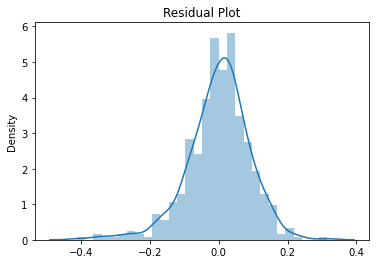

In [181]:
res = y_train - y_train_pred
plt.figure()
sns.distplot(res)
plt.title('Residual Plot')
plt.show()

##### Observation: the above diagram shows that residual are normally disutributed and mean lies at 0.0.

# Predictions on test set

In [182]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'misty', 'stormy',
       'summer', 'winter', 'sep', 'mon'],
      dtype='object')

In [183]:
mod_13 = ['temp', 'hum', 'windspeed', 'cnt']
df_test[mod_13] = scaler.transform(df_test[mod_13])

In [184]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,clear,misty,stormy,...,sep,oct,nov,dec,wed,thu,fri,sat,sun,mon
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.654545,0.318182,0.027273,...,0.086364,0.086364,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.476601,0.466833,0.163248,...,0.281541,0.281541,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [185]:
y_test = df_test.pop('cnt')
X_test = df_test

In [186]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,clear,misty,stormy,...,sep,oct,nov,dec,wed,thu,fri,sat,sun,mon
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,1,0,...,0,0,0,0,1,0,0,0,0,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,1,0,0,...,0,0,0,0,0,0,1,0,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,1,0,...,0,1,0,0,0,0,0,1,0,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,1,0,0,...,0,0,0,0,0,0,1,0,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [187]:
X_test_sm.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'clear', 'misty', 'stormy', 'summer', 'fall', 'winter', 'feb', 'mar',
       'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'wed',
       'thu', 'fri', 'sat', 'sun', 'mon'],
      dtype='object')

In [188]:
X_test_sm = X_test_sm.drop(['hum', 
       'clear', 'fall', 'feb', 'mar',
       'apr', 'may', 'jun', 'jul', 'oct', 'nov', 'dec', 'wed',
       'thu', 'fri', 'sat', 'sun', 'aug'], axis=1)

In [189]:
X_test_sm.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'windspeed', 'misty',
       'stormy', 'summer', 'winter', 'sep', 'mon'],
      dtype='object')

In [190]:
y_test_pred = lr_model.predict(X_test_sm)

In [191]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7969008872616741

In [192]:
r2 = 0.7969008872616741

In [193]:
n = X_test_sm.shape[0]

In [194]:
p = X_test_sm.shape[1]

In [195]:
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

In [196]:
adjusted_r2

0.7851270256536552

### FINAL OBSERVATION
##### Train R2: 83.7 %
##### Train Adjusted R2: 83.3 %
##### Test R2: 79.6 %
##### Test Adjusted R2: 78.5 %

# Final Report

##### As per final model 31, the top predictors which are significant are,
##### 1. Temperature: coeffieient value of 0.5477 indicates a unit increase in temperature variable will increase bike hiring count by 0.5477.
##### 2. Stormy: coeffieient value of -0.2884 indicates a unit increase in stormy variable will decrease bike hiring count by 0.2884.
##### 3. Windspeed: coeffieient value of -0.1542 indicates a unit increase in windspeed variable will decrease bike hiring count by 0.1542.
##### 4. Winter: coeffieient value of 0.1310 indicates a unit increase in winter variable will increase bike hiring count by 0.1310 .
##### 5. Sep: coeffieient value of 0.0994 indicates a unit increase in sep variable will increase bike hiring count by 0.0994 .


##### Note: yr variable's coefficient being 0.2330 is still not considered for the variables. This was intentional because, the target here was to factors effecting the change in count of bikes being hired. Factors like, human behaviour or environment condition.



# RFE
##### Recursive feature eliminaiton. Executing this to just compare the final model 14 with RFE.

In [197]:
df_train.shape, df_test.shape

((510, 29), (220, 29))

In [198]:
y_train.shape, X_train.shape

((510,), (510, 29))

In [199]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [200]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 12)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('clear', True, 1),
 ('misty', False, 3),
 ('stormy', True, 1),
 ('summer', True, 1),
 ('fall', False, 5),
 ('winter', True, 1),
 ('feb', False, 10),
 ('mar', False, 6),
 ('apr', False, 8),
 ('may', False, 7),
 ('jun', False, 9),
 ('jul', False, 11),
 ('aug', True, 1),
 ('sep', True, 1),
 ('oct', False, 4),
 ('nov', False, 12),
 ('dec', False, 13),
 ('wed', False, 14),
 ('thu', False, 15),
 ('fri', False, 17),
 ('sat', False, 18),
 ('sun', False, 16),
 ('mon', True, 1)]